In [1]:
#Om Sri Sai Ram

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

import time

import torch
import torch.nn as nn
from torch.autograd import Variable
import random  
import math

In [10]:
df0 = pd.read_csv('byaddress_v2_2.csv')

In [11]:
df0.columns

Index(['address', 'Severity', 'census_tract_number', 'living_area',
       'ct_perc_disability', 'ct_perc_children_under_5', 'ct_perc_over_65',
       'ct_perc_low_to_no_income', 'ct_perc_limited_english_proficiency',
       'ct_perc_poc', 'ct_perc_med_illness', 'ct_perc_income_200000_or_more',
       'sqft_class_code', 'ext_cond_list_code', 'year_built_class_code',
       'building_subtypology_Garage, 1915-1949',
       'building_subtypology_Multi-Family (2 units), 1915-1949',
       'building_subtypology_Multi-Family (2 units), 1950-1979',
       'building_subtypology_Multi-Family (2 units), 1980-present',
       'building_subtypology_Multi-Family (2 units), Pre-1915',
       'building_subtypology_Multi-Family (3 units), 1915-1949',
       'building_subtypology_Multi-Family (3 units), 1950-1979',
       'building_subtypology_Multi-Family (3 units), 1980-present',
       'building_subtypology_Multi-Family (3 units), Pre-1915',
       'building_subtypology_Multi-Family (31-99 units), 1

In [12]:
df = df0.drop(columns=['address','Severity','census_tract_number','Severity_class','flood_f','stormwater_f'])

In [15]:
X = df.drop(columns=['Severity_class_v2']).to_numpy()

In [18]:
X.shape

(25537, 82)

In [227]:
y_full = df['Severity_class_v2'].to_numpy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [21]:
scaler = StandardScaler().fit(X_train)

In [22]:
X_train = scaler.transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [31]:
pca = PCA().fit(X_train)

In [32]:
X_train = pca.transform(X_train)[:,:60 + 1]

In [33]:
X_test = pca.transform(X_test)[:,:60 + 1]

In [85]:
y_train = y_train.reshape(-1,1)

In [86]:
y_test = y_test.reshape(-1,1)

### Logistic Regression

In [34]:
clf = LogisticRegression(random_state=42,class_weight='balanced',max_iter=1000).fit(X_train, y_train)

In [35]:
clf.score(X_train,y_train)

0.5771528024999011

In [283]:
clf.score(X_train,y_train)

0.5824810921371831

In [289]:
X_train.shape

(42046, 61)

In [286]:
y_train.sum() / y_train.shape[0]

0.5

In [285]:
y_test.sum() / y_test.shape[0]

tensor(0.5000)

In [290]:
y_test.shape

torch.Size([446, 1])

In [282]:
clf.score(X_test,y_test)

0.6591928251121076

In [292]:
list(zip(clf.coef_

array([[ 0.03298408, -0.10520495, -0.13303371,  0.03936669,  0.10247732,
         0.08642035, -0.04344939,  0.13314707,  0.01059221,  0.05947665,
         0.05710409, -0.01402826, -0.0245786 , -0.02044535,  0.06512275,
        -0.11909913, -0.12841551, -0.0934098 , -0.04275277,  0.10292611,
        -0.04085625,  0.02051186,  0.01161451, -0.02773687,  0.10530793,
        -0.18816531, -0.26734417, -0.12427207,  0.40067061, -0.08880516,
         0.13838522,  0.20975325,  0.07992966,  0.18909281,  0.02218673,
         0.2119739 , -0.22731324, -0.10940377, -0.1383626 , -1.10388994,
        -0.04174357,  0.32633754,  0.54193638,  0.50294711, -0.58158581,
         1.20388439,  0.04279146, -0.32671567,  0.95538669, -0.1901751 ,
         0.09221477,  0.25934329, -0.09212087,  0.28878681, -0.32801817,
        -0.11799489,  0.02554553, -0.1384304 ,  0.17401482, -0.19536408,
        -0.03740723]])

### NN

In [36]:
X_train.shape

(25281, 61)

In [87]:
y_train.shape

(25281, 1)

In [95]:
X_train_maj = X_train[(y_train == 0).reshape(-1),:]

In [108]:
X_train_maj.shape

(21023, 61)

In [98]:
y_train_maj = y_train[(y_train == 0)]

In [100]:
X_train_mino = X_train[(y_train == 1).reshape(-1),:]

In [101]:
y_train_mino = y_train[(y_train == 1)]

In [102]:
X_train_mino = resample(X_train_mino,n_samples=X_train_maj.shape[0],replace=True,random_state=42)

In [104]:
X_train_mino.shape

(21023, 61)

In [105]:
y_train_mino = np.ones(shape=X_train_mino.shape[0])

In [106]:
y_train_mino.shape

(21023,)

In [109]:
X_train = np.vstack([X_train_maj,X_train_mino])

In [113]:
y_train = np.vstack([y_train_maj.reshape(-1,1),y_train_mino.reshape(-1,1)])

In [114]:
y_train.shape

(42046, 1)

In [115]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.01, random_state=42)

In [118]:
y_tr.sum() / y_tr.shape[0]

0.5002042042042042

In [119]:
y_val.sum() / y_val.shape[0]

0.47980997624703087

In [140]:
y

tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]])

In [170]:

inputSize = X_tr.shape[1]
hiddenLayer1Size = 100
hiddenLayer2Size = 10
outputSize=1


net = nn.Sequential(
    
    torch.nn.Linear(inputSize, hiddenLayer1Size),
    torch.nn.ReLU(),      
    
    torch.nn.Linear(hiddenLayer1Size, hiddenLayer2Size),
    torch.nn.ReLU(),
    torch.nn.Linear(hiddenLayer2Size, hiddenLayer2Size),
    torch.nn.ReLU(),
    torch.nn.Linear(hiddenLayer2Size, outputSize),
 
    torch.nn.Sigmoid()
    
    )

x = Variable(torch.from_numpy( np.array(X_tr).astype('float32') ), requires_grad=False) 
y = Variable(torch.from_numpy( np.array(y_tr).astype('float32') ), requires_grad=False)


criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)

In [281]:
torch.save(net,'classification_nn_1')

In [171]:
loss_list =[]
loss_orig = criterion(net(x), y)
loss_list.append(loss_orig)

In [190]:
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)

In [191]:
start = time.time()
for t in range(1,60000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = net(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    loss_list.append(loss)
    if t%400 == 0 or t==1:
        print(t, loss.item())

    # Zero gradients, perform a backward pass 
    optimizer.zero_grad()   # clearing the gradients
    loss.backward()         # computing the gradients ( Automatic differentiation)

    # Update the weights.
    optimizer.step()        # updating the network paramters 
   
loss_final = criterion(net(x), y)
print( 'before and after training loss:', loss_orig.item(),loss_final.item())
elapsed = (time.time() - start)
print("Time taken: ",elapsed)  

1 0.571642279624939
400 0.5636788010597229
800 0.5598018765449524
1200 0.5565944910049438
1600 0.5540689826011658
2000 0.5519326329231262
2400 0.5499319434165955
2800 0.5480765700340271
3200 0.5463532209396362
3600 0.544733464717865
4000 0.5431721806526184
4400 0.5416792035102844
4800 0.5402705073356628
5200 0.5388851761817932
5600 0.5374546647071838
6000 0.5360561013221741
6400 0.5346884727478027
6800 0.5333401560783386
7200 0.5320464372634888
7600 0.530814528465271
8000 0.5296698808670044
8400 0.5285137295722961
8800 0.527389645576477
9200 0.5263740420341492
9600 0.5253189206123352
10000 0.524217963218689
10400 0.5233649611473083
10800 0.5221564769744873
11200 0.521235466003418
11600 0.5202246904373169
12000 0.5190978646278381
12400 0.5180940628051758
12800 0.5176140666007996
13200 0.5167264342308044
13600 0.5157877206802368
14000 0.5148699879646301
14400 0.5140784382820129
14800 0.5145809054374695
15200 0.5135433673858643
15600 0.5138428807258606
16000 0.5118513107299805
16400 0.513

KeyboardInterrupt: 

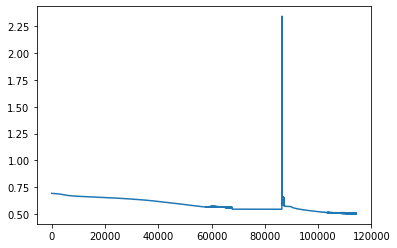

In [223]:
plt.plot(list(range(len(loss_list))), [t.tolist() for t in loss_list])
plt.show()

In [288]:
(net(x).round() == y).sum().item() / y_tr.shape[0]

0.741981981981982

In [291]:
x.shape

torch.Size([41625, 61])

In [155]:
x_val = Variable(torch.from_numpy( np.array(X_val).astype('float32') ), requires_grad=False) 
y_val = Variable(torch.from_numpy( np.array(y_val).astype('float32') ), requires_grad=False)

In [192]:
criterion(net(x_val),y_val)

tensor(0.5987, grad_fn=<BinaryCrossEntropyBackward0>)

In [196]:
(net(x_val).round() == y_val).sum()

tensor(295)

In [197]:
y_val.shape

torch.Size([421, 1])

In [198]:
(net(x_val).round() == y_val).sum().item() / 421

0.7007125890736342

In [202]:
(net(x_val).round()).sum().item() / 421

0.46080760095011875

In [207]:
X_test.shape

(256, 61)

In [204]:
X_test_maj = X_test[(y_test == 0).reshape(-1),:]

In [206]:
X_test_maj.shape

(223, 61)

In [208]:
y_test_maj = y_test[(y_test == 0)]

In [209]:
X_test_mino = X_test[(y_test == 1).reshape(-1),:]

In [210]:
y_test_mino = y_test[(y_test == 1)]

In [211]:
X_test_mino = resample(X_test_mino,n_samples=X_test_maj.shape[0],replace=True,random_state=42)

In [212]:
X_test_mino.shape

(223, 61)

In [213]:
y_test_mino = np.ones(shape=X_test_mino.shape[0])

In [214]:
y_test_mino.shape

(223,)

In [215]:
np.vstack([X_test_maj,X_test_mino]).shape

(446, 61)

In [216]:
X_test = np.vstack([X_test_maj,X_test_mino])

In [217]:
y_test = np.vstack([y_test_maj.reshape(-1,1),y_test_mino.reshape(-1,1)])

In [218]:
X_test.shape

(446, 61)

In [219]:
y_test.shape

(446, 1)

In [220]:
x_test = Variable(torch.from_numpy( np.array(X_test).astype('float32') ), requires_grad=False) 
y_test = Variable(torch.from_numpy( np.array(y_test).astype('float32') ), requires_grad=False)

In [221]:
y_test.sum() / y_test.shape[0]

tensor(0.5000)

In [222]:
(net(x_test).round() == y_test).sum().item() / y_test.shape[0]

0.57847533632287

In [224]:
y_test_pred = net(x_test).round()

In [270]:
y_test_pred.sum()

tensor(157., grad_fn=<SumBackward0>)

In [276]:
results_df = pd.DataFrame(X_test).iloc[:,:2]

In [277]:
results_df['y_test'] = y_test

In [279]:
results_df['y_pred'] = y_test_pred.detach().numpy()

In [280]:
results_df.to_csv('test_results.csv')

In [228]:
_, X_test_full, _, y_test_full = train_test_split(X, y_full, test_size=0.01, random_state=42)

In [247]:
y_test_full.shape

(256,)

In [230]:
X_test_df = pd.DataFrame(X_test_full,columns=df.drop(columns=['Severity_class_v2']).columns)

In [234]:
X_test_df['y_test'] = y_test_full

In [236]:
X_test_df.to_csv('test_set.csv')

In [241]:
X_test_full_pca = pca.transform(X_test_full)[:,:60+1]

In [253]:
x_test_nonupsamp = Variable(torch.from_numpy( np.array(X_test_full_pca).astype('float32') ), requires_grad=False) 
y_test_nonupsamp = Variable(torch.from_numpy( np.array(y_test_full.reshape(-1,1)).astype('float32') ), requires_grad=False)

In [254]:
X_test_full.shape

(256, 82)

In [255]:
net(x_test_nonupsamp).round().shape

torch.Size([256, 1])

In [256]:
y_test_nonupsamp.shape

torch.Size([256, 1])

In [257]:
(net(x_test_nonupsamp).round() == y_test_nonupsamp).sum()

tensor(223)

In [272]:
y_test_nonupsamp_pred = net(x_test_nonupsamp).round()

In [273]:
y_test_nonupsamp_pred.sum()

tensor(0., grad_fn=<SumBackward0>)

In [267]:
X_test_df['y_pred'] = y_test_nonupsamp_pred.reshape(-1).detach().numpy()

In [269]:
X_test_df.y_pred.unique()

array([0.], dtype=float32)